# DLML task 1:measure of descriptive stastistics


In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [159]:
df["price_per_sqft"].value_counts()

price_per_sqft
5000     148
4000     139
3500     109
10000     77
5500      74
        ... 
4383       1
14933      1
7854       1
10400      1
10407      1
Name: count, Length: 4951, dtype: int64

In [10]:
df["price_per_sqft"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13200 entries, 0 to 13199
Series name: price_per_sqft
Non-Null Count  Dtype
--------------  -----
13200 non-null  int64
dtypes: int64(1)
memory usage: 103.3 KB


In [5]:
df["price_per_sqft"].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [11]:
df=df.drop_duplicates()
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [6]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [12]:
df.price_per_sqft.mean()

8132.641840177763

In [7]:
df.price_per_sqft.median()

5438.0

In [13]:
df.price_per_sqft.quantile([0.25,0.50,0.75])

0.25    4312.0
0.50    5500.0
0.75    7461.0
Name: price_per_sqft, dtype: float64

In [15]:
q1=df.price_per_sqft.quantile(0.25)
q3=df.price_per_sqft.quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(4312.0, 7461.0, 3149.0)

In [16]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
lower,upper

(-411.5, 12184.5)

In [19]:
outliers=df[(df.price_per_sqft<lower)|(df.price_per_sqft>upper)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571


In [20]:
non_outliers=df[(df.price_per_sqft>=lower)&(df.price_per_sqft<=upper)]
non_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [21]:
non_outliers.price_per_sqft.mean()

5679.342447088746

In [22]:
non_outliers.price_per_sqft.median()

5252.0

In [23]:
non_outliers.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000
mean,1535.555668,2.567626,90.559052,2.673994,5679.342447
std,1238.075962,1.155509,77.048031,1.090265,2044.139791
min,276.000000,1.000000,8.000000,1.000000,267.000000
25%,1100.000000,2.000000,49.000000,2.000000,4204.000000
50%,1282.000000,2.000000,68.100000,3.000000,5252.000000
75%,1655.000000,3.000000,104.000000,3.000000,6693.000000
max,52272.000000,27.000000,2100.000000,27.000000,12173.000000


In [24]:
numerical_columns=non_outliers.select_dtypes(include="number")
numerical_columns

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13194,1715.0,3.0,112.00,3,6530
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258


In [25]:
corr=numerical_columns.corr()
corr

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.442982,0.656957,0.414154,0.132101
bath,0.442982,1.000000,0.558839,0.883993,0.354145
price,0.656957,0.558839,1.000000,0.488424,0.610310
bhk,0.414154,0.883993,0.488424,1.000000,0.310048
price_per_sqft,0.132101,0.354145,0.610310,0.310048,1.000000


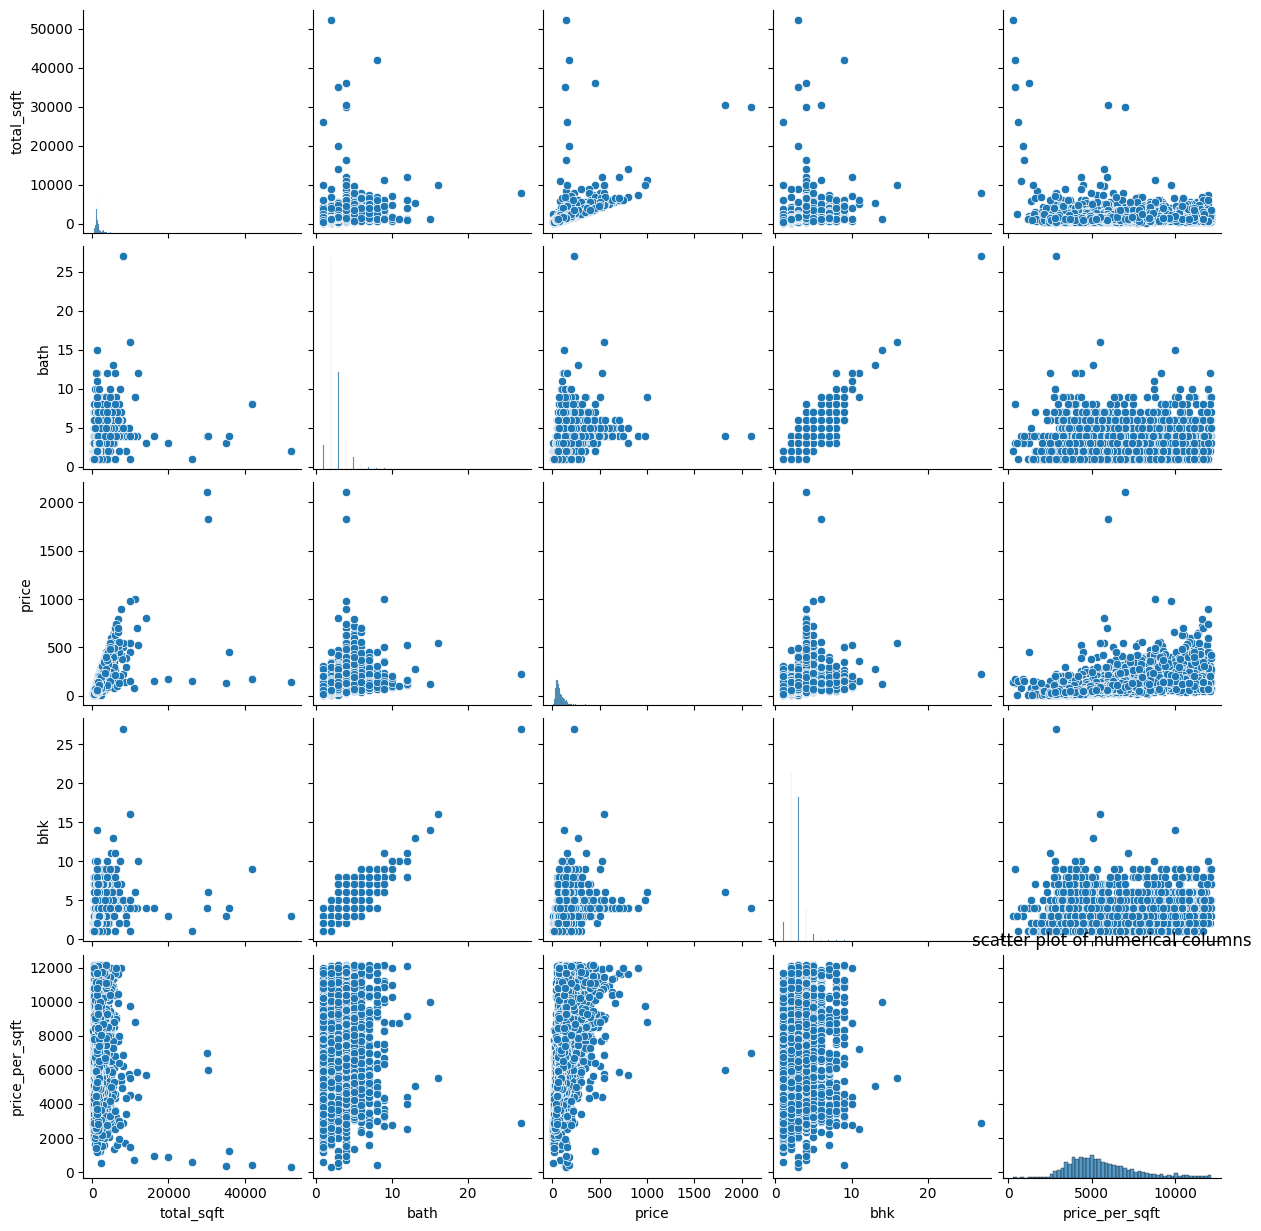

In [26]:
#pair plot
#scatter ploting of numerical columns
sns.pairplot(numerical_columns)
plt.title("scatter plot of numerical columns")
plt.show()

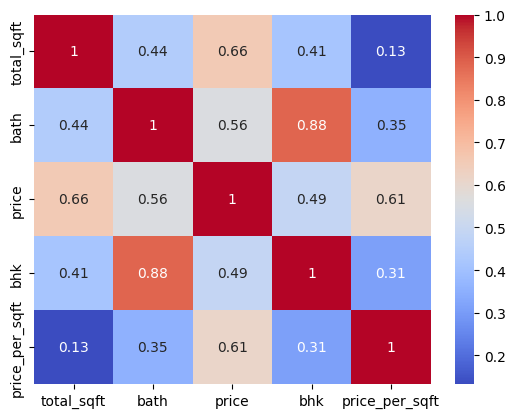

In [27]:
#heat map
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

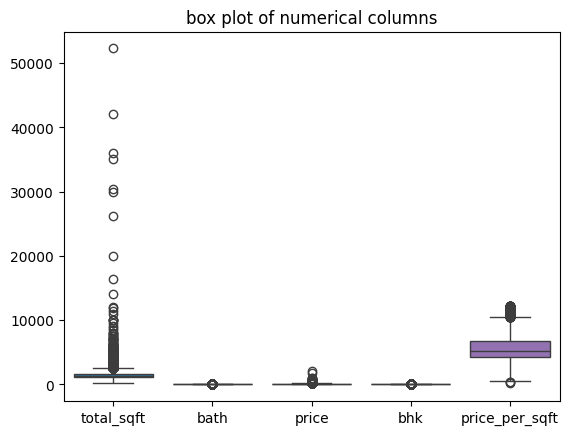

In [28]:
#box plot
sns.boxplot(data=numerical_columns)
plt.title("box plot of numerical columns")
plt.show()

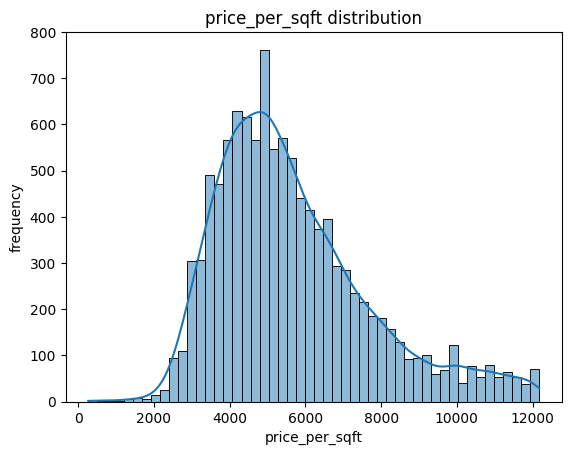

In [29]:
#hist plot
sns.histplot(numerical_columns["price_per_sqft"],bins=50,kde=True)
plt.xlabel("price_per_sqft")
plt.ylabel("frequency")
plt.title("price_per_sqft distribution")
plt.show()

In [30]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [31]:
#identifying and removing outliers using normal distribution
m=df.price_per_sqft.mean()
s=df.price_per_sqft.std()
u=m+3*s
v=m-3*s
m,s,u,v

(8132.641840177763, 111232.90089570847, 341831.3445273032, -325566.06084694766)

In [47]:
dfnor=df[(df["price_per_sqft"]>v) & (df["price_per_sqft"]<u)]
dfnor.drop_duplicates()
dfnor

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


In [62]:
dfnor.describe()


,total_sqft,bath,price,bhk,price_per_sqft,zscore
count,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000
mean,1575.485996,2.719414,115.463124,2.826774,6821.889593,-0.011784
std,1277.201551,1.371826,154.122258,1.326039,4988.483439,0.044847
min,15.000000,1.000000,8.000000,1.000000,267.000000,-0.070713
25%,1100.000000,2.000000,50.000000,2.000000,4312.000000,-0.034348
50%,1290.000000,2.000000,74.000000,3.000000,5500.000000,-0.023668
75%,1700.000000,3.000000,123.000000,3.000000,7456.750000,-0.006076
max,52272.000000,40.000000,3600.000000,43.000000,200000.000000,1.724916


In [63]:
mean=dfnor.price_per_sqft.mean()
median=dfnor.price_per_sqft.median()
mean,median

(6821.889593281739, 5500.0)

In [48]:
#identifyting and removing outlier using z_scre
df["zscore"]=(df.price_per_sqft-m)/s  #z=  x-mean/std
df

C:\Users\final solution\AppData\Local\Temp\ipykernel_29688\3506638316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["zscore"]=(df.price_per_sqft-m)/s  #z=  x-mean/std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


In [49]:
df = df[(df.zscore >= -3) & (df.zscore <= 3)]
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


In [50]:
df1=df.drop_duplicates()
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


In [192]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
#removing outliers using z_score with the help of scipy
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df['price_per_sqft'])

# Identify and remove outliers using Z-scores
df2 = df[(z_scores >= -3) & (z_scores <= 3)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


In [37]:
df2=df2.drop_duplicates()
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


In [52]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft,zscore
count,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000
mean,1575.485996,2.719414,115.463124,2.826774,6821.889593,-0.011784
std,1277.201551,1.371826,154.122258,1.326039,4988.483439,0.044847
min,15.000000,1.000000,8.000000,1.000000,267.000000,-0.070713
25%,1100.000000,2.000000,50.000000,2.000000,4312.000000,-0.034348
50%,1290.000000,2.000000,74.000000,3.000000,5500.000000,-0.023668
75%,1700.000000,3.000000,123.000000,3.000000,7456.750000,-0.006076
max,52272.000000,40.000000,3600.000000,43.000000,200000.000000,1.724916


In [53]:
median=df1.price_per_sqft.median()
mean=df1.price_per_sqft.mean()
q2=df1.price_per_sqft.quantile(0.50)
median,mean,q2

(5500.0, 6821.889593281739, 5500.0)

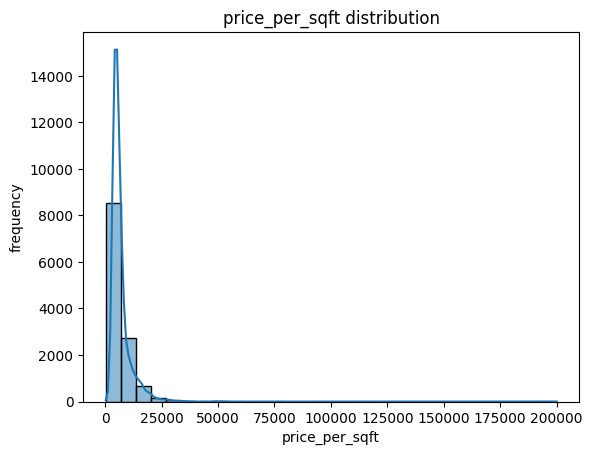

In [54]:
#hist plot of non outlier values of the data removed using z_score
sns.histplot(df1["price_per_sqft"],bins=30,kde=True)
plt.xlabel("price_per_sqft")
plt.ylabel("frequency")
plt.title("price_per_sqft distribution")
plt.show()

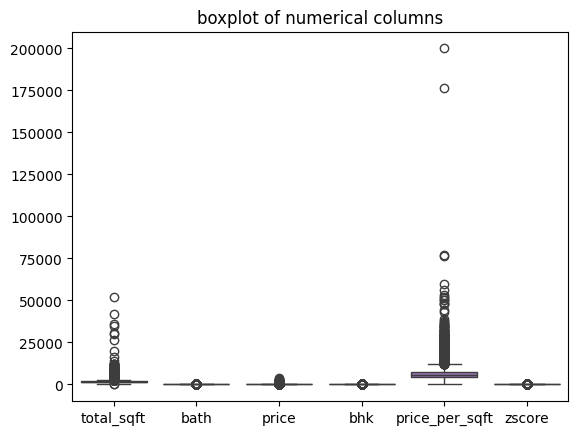

In [55]:
#box plot of non_outlier values of the data removed using z_score
sns.boxplot(data=df1)
plt.title("boxplot of numerical columns")
plt.show()

In [56]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft,zscore
count,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000
mean,1563.114542,2.688507,107.173784,2.797179,6489.713546,-0.014770
std,1258.868336,1.290634,116.121916,1.236788,3433.039971,0.030864
min,250.000000,1.000000,8.000000,1.000000,267.000000,-0.070713
25%,1100.000000,2.000000,50.000000,2.000000,4298.000000,-0.034474
50%,1286.000000,2.000000,72.500000,3.000000,5475.000000,-0.023893
75%,1690.000000,3.000000,120.000000,3.000000,7327.000000,-0.007243
max,52272.000000,27.000000,2200.000000,27.000000,21739.000000,0.122323


In [57]:
median=df2.price_per_sqft.median()
mean=df2.price_per_sqft.mean()
q2=df2.price_per_sqft.quantile(0.50)
median,mean,q2

(5475.0, 6489.713546448544, 5475.0)

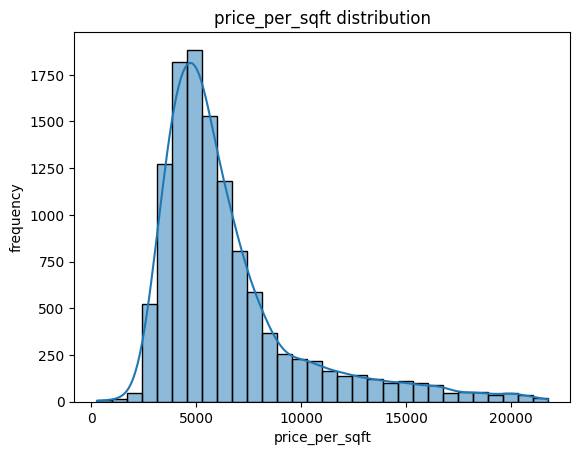

In [58]:
#hist plot of non outlier values of the data removed using z_score
sns.histplot(df2["price_per_sqft"],bins=30,kde=True)
plt.xlabel("price_per_sqft")
plt.ylabel("frequency")
plt.title("price_per_sqft distribution")
plt.show()

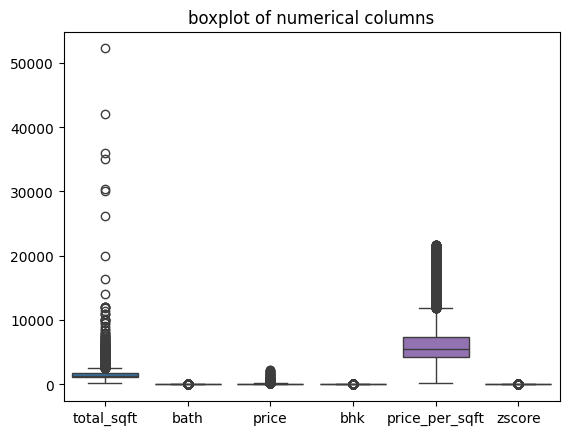

In [59]:
#box plot of non_outlier values of the data removed using z_score
sns.boxplot(data=df2)
plt.title("boxplot of numerical columns")
plt.show()

In [64]:
from scipy.stats import skew, kurtosis

In [66]:
dfnor["price_per_sqft"].skew()

10.522738553105086

In [67]:
kurtosis(dfnor["price_per_sqft"],fisher=False)

312.9634670607257

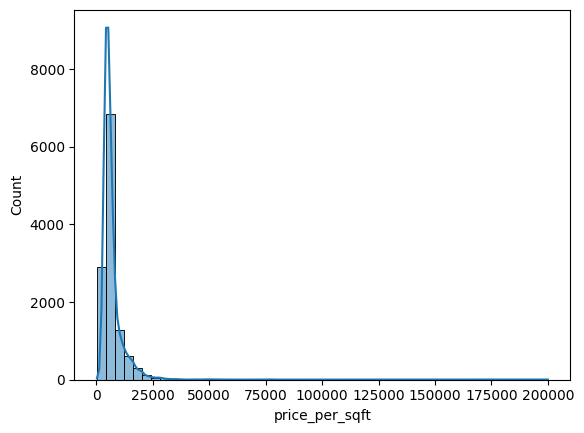

In [76]:
sns.histplot(dfnor["price_per_sqft"],bins=50,kde=True)
plt.show()

In [82]:
dfnor['log_price_per_sqft']=np.log(dfnor["price_per_sqft"])

In [83]:
dfnor['log_price_per_sqft']

0        8.215818
1        8.437067
2        8.367532
3        8.739536
4        8.354674
           ...   
13194    8.784162
13195    8.808220
13196    9.315691
13197    8.567506
13198    9.250234
Name: log_price_per_sqft, Length: 12146, dtype: float64

In [84]:
dfnor["log_price_per_sqft"].skew()

0.8479649839006448

In [85]:
kurtosis(dfnor["log_price_per_sqft"],fisher=False)

4.853764316108764

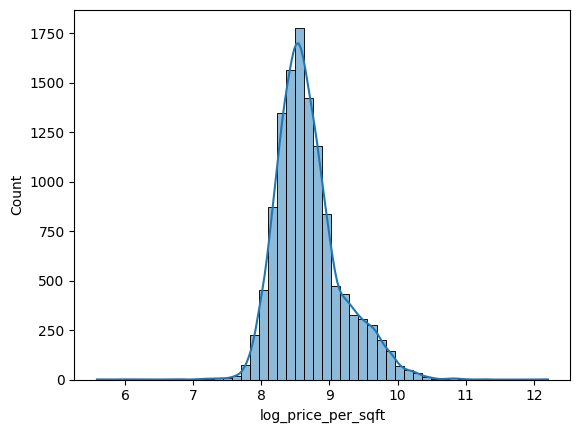

In [87]:
sns.histplot(dfnor["log_price_per_sqft"],bins=50,kde=True)
plt.show()

In [88]:
mean=dfnor["log_price_per_sqft"].mean()
median=dfnor["log_price_per_sqft"].median()
mean,median

(8.691320325167666, 8.612503371220562)